In [1]:
import scanpy as sc
import numpy as np
import random
import matplotlib.pyplot as plt
import scanpy.external as sce
sc.settings.verbosity = 3
sc.set_figure_params(dpi=100)
np.random.seed(66)

data_path = "E:/Mouse_S1/"

adata = sc.read_h5ad(data_path + "S1_atlas_raw.h5ad")
adata

AnnData object with n_obs × n_vars = 81050 × 31053
    obs: 'class_label', 'subclass_label', 'cluster_label', 'cell_type_alias_label', 'external_donor_name_id'

In [2]:
adata.obs

,class_label,subclass_label,cluster_label,cell_type_alias_label,external_donor_name_id
ATTGGTGGTGACTACT-L8TX_180907_01_G11,GABAergic,Lamp5,13_Lamp5,13_Lamp5,535
AGGGAGTCATGAAGTA-L8TX_180907_01_H11,GABAergic,Lamp5,18_Lamp5,18_Lamp5,536
AGGGAGTGTAGCGTCC-L8TX_180907_01_H11,GABAergic,Lamp5,18_Lamp5,18_Lamp5,536
GCGCAACTCCCTTGTG-L8TX_180907_01_H11,GABAergic,Lamp5,13_Lamp5,13_Lamp5,536
TGCTACCAGTGGAGTC-L8TX_180907_01_H11,GABAergic,Lamp5,12_Lamp5,12_Lamp5,536
...,...,...,...,...,...
TTTGTCAGTCATCGGC-L8TX_190312_01_A02,Glutamatergic,L5/6 NP CTX,265_L5/6 NP CTX,265_L5/6 NP CTX,567
TTTGTCATCCGTCAAA-L8TX_190312_01_A02,Glutamatergic,L4/5 IT CTX,178_L4 IT CTX,178_L4 IT CTX,567
TTTGTCATCGTACGGC-L8TX_190312_01_A02,Glutamatergic,L6 IT CTX,228_L6 IT CTX,228_L6 IT CTX,567
TTTGTCATCTCAAGTG-L8TX_190312_01_A02,Non-Neuronal,Astro,376_Astro,376_Astro,567


In [3]:
sc.pp.filter_cells(adata, min_genes=700)
sc.pp.filter_genes(adata, min_cells=8)

filtered out 7503 genes that are detected in less than 8 cells


In [4]:
mito_genes = adata.var_names.str.startswith('mt-')
adata.obs['percent_mito'] = 100 * (np.sum(adata[:, mito_genes].X, axis=1) / np.sum(adata.X, axis=1))
adata.obs["n_UMIs"] = np.sum(adata.X, axis=1)

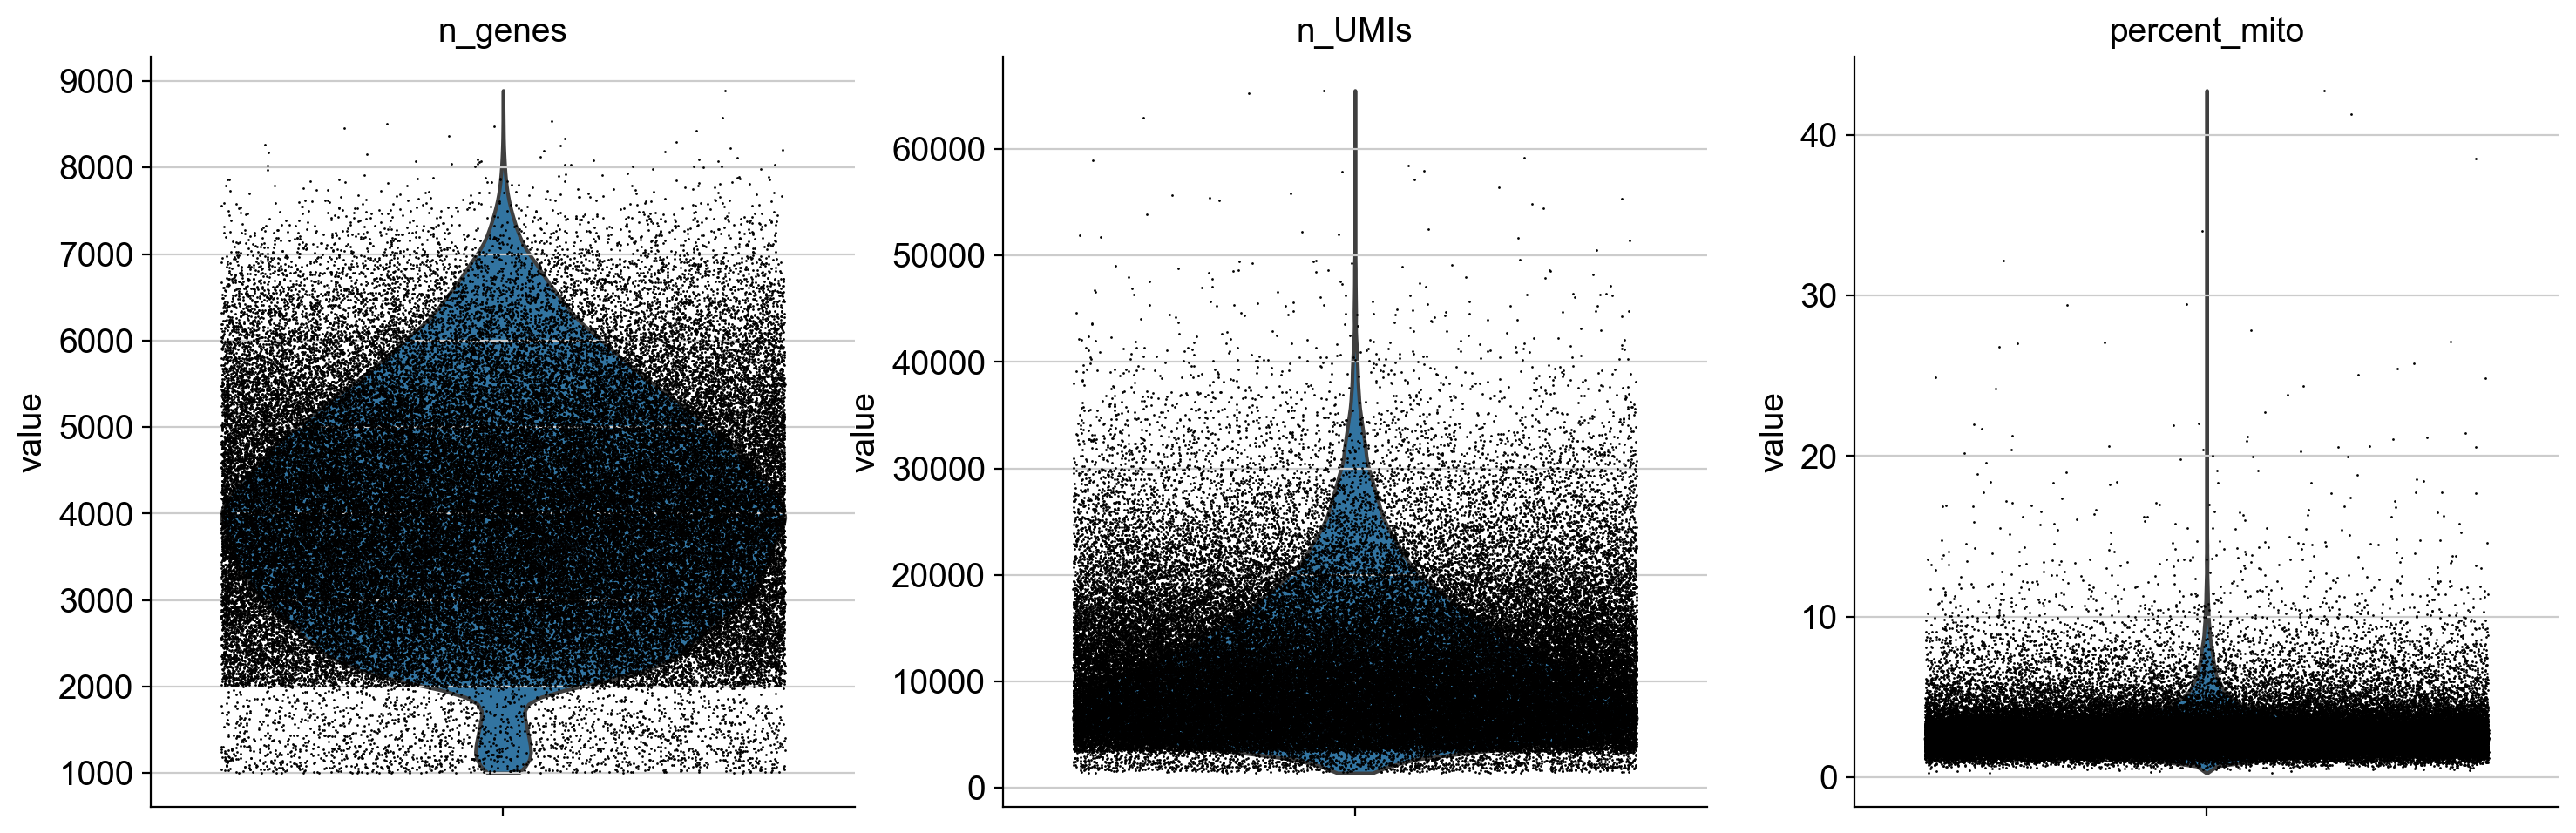

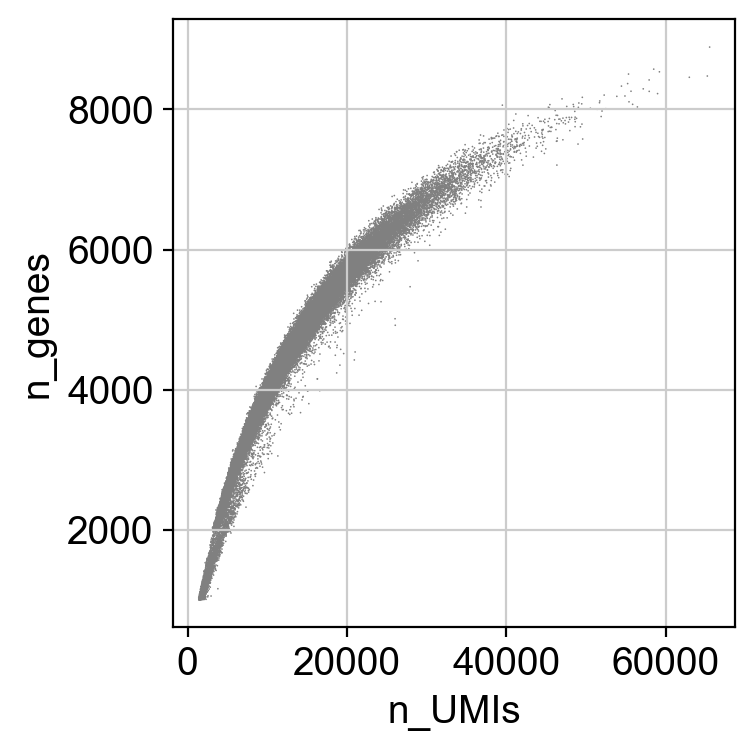

In [5]:
sc.pl.violin(adata, ["n_genes", "n_UMIs", "percent_mito"], jitter=0.4, multi_panel=True)
sc.pl.scatter(adata, x="n_UMIs", y="n_genes")

In [6]:
adata = adata[adata.obs.percent_mito < 6, :]
adata = adata[adata.obs["n_genes"] < 6500, :]
adata = adata[adata.obs["n_UMIs"] < 40000, :]

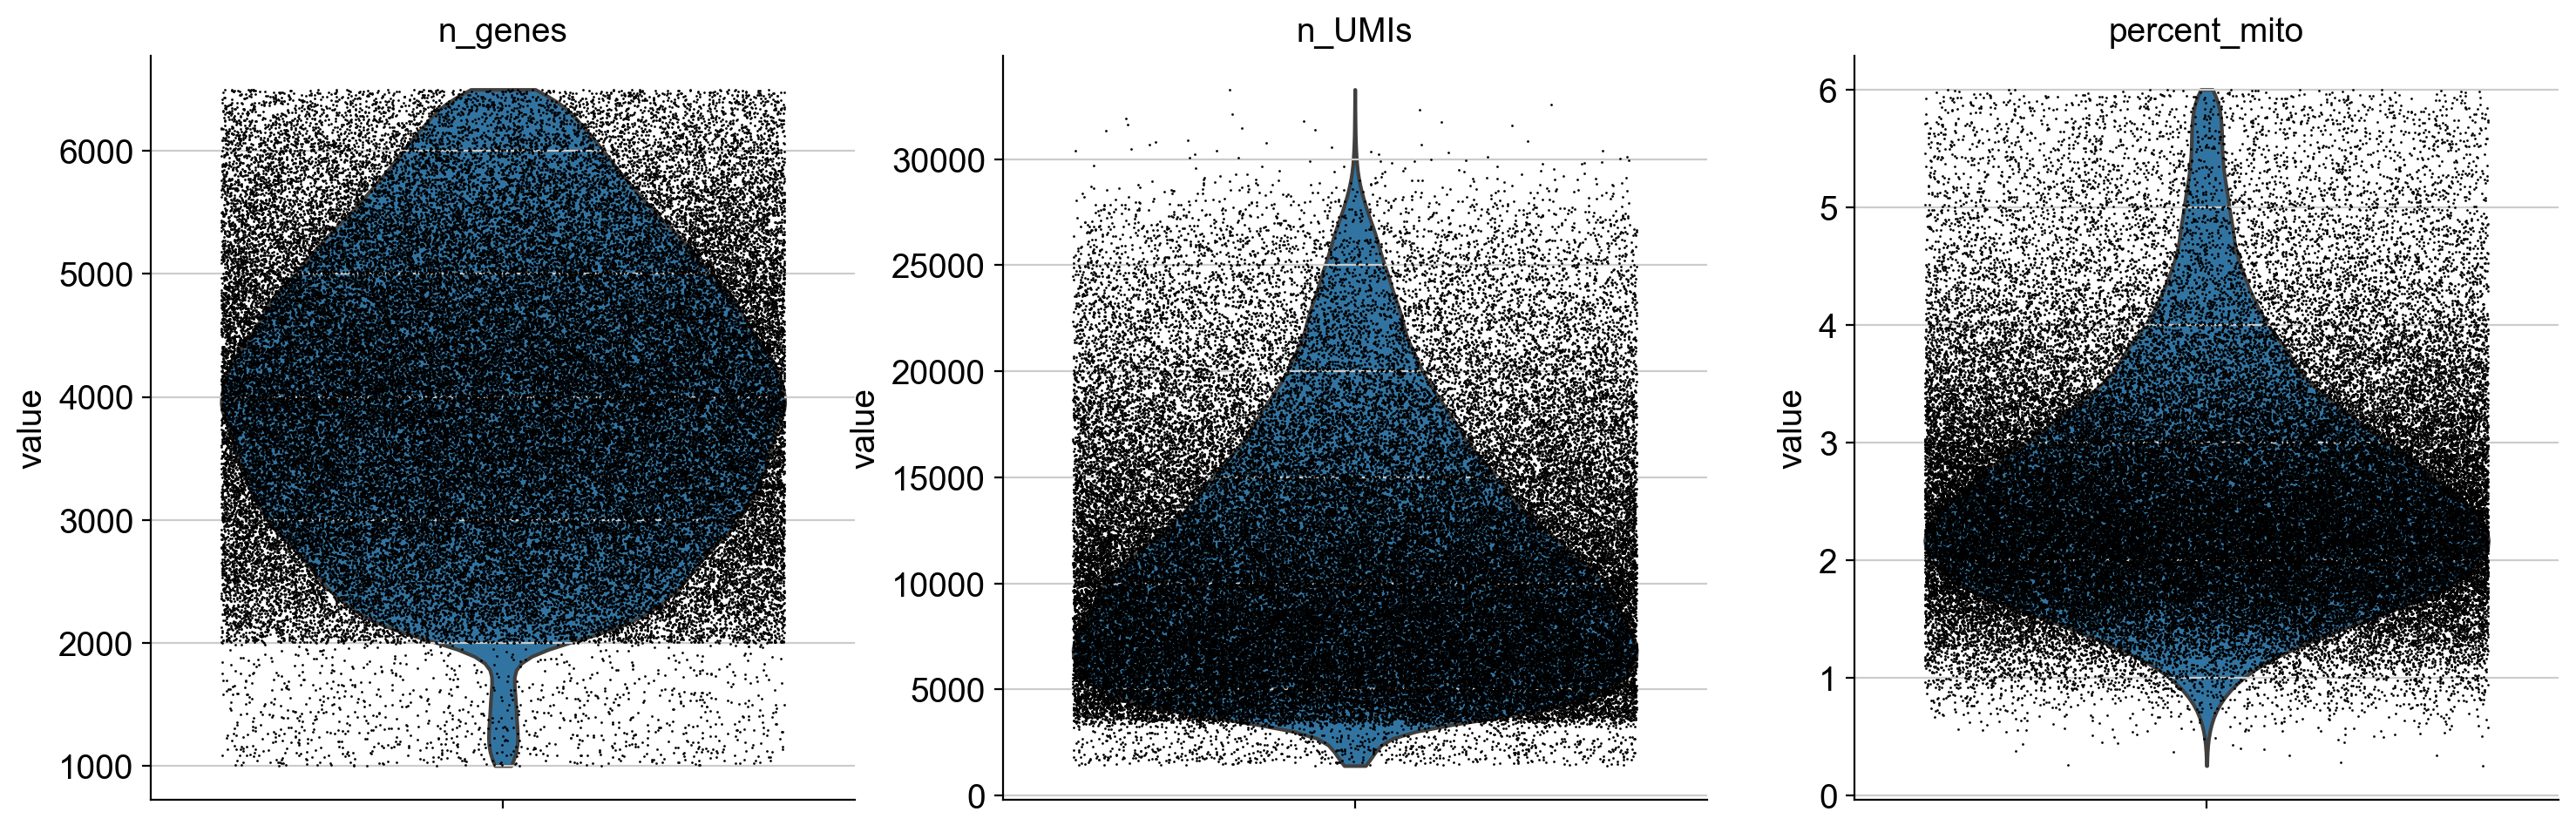

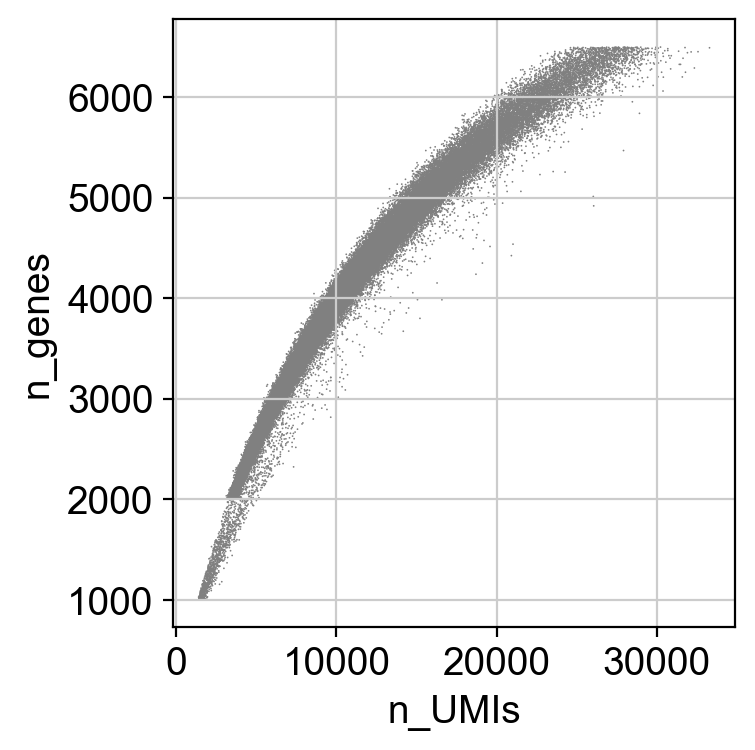

In [7]:
sc.pl.violin(adata, ["n_genes", "n_UMIs", "percent_mito"], jitter=0.4, multi_panel=True)
sc.pl.scatter(adata, x="n_UMIs", y="n_genes")

In [8]:
adata_raw = adata.copy()
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)
sc.pp.log1p(adata)
adata.raw = adata
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pp.scale(adata, max_value=10)

normalizing by total count per cell


C:\Ryan\GitHub\scanpy\scanpy\preprocessing\_simple.py:523: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[key_n_counts] = counts_per_cell


    finished (0:00:07): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)
extracting highly variable genes
    finished (0:00:04)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:08)
computing neighbors
    using 'X_pca' with n_pcs = 40


c:\Users\TLab\anaconda3\envs\scanpy\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:43)
running Leiden clustering
    finished: found 29 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:30)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:01:10)


C:\Ryan\GitHub\scanpy\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


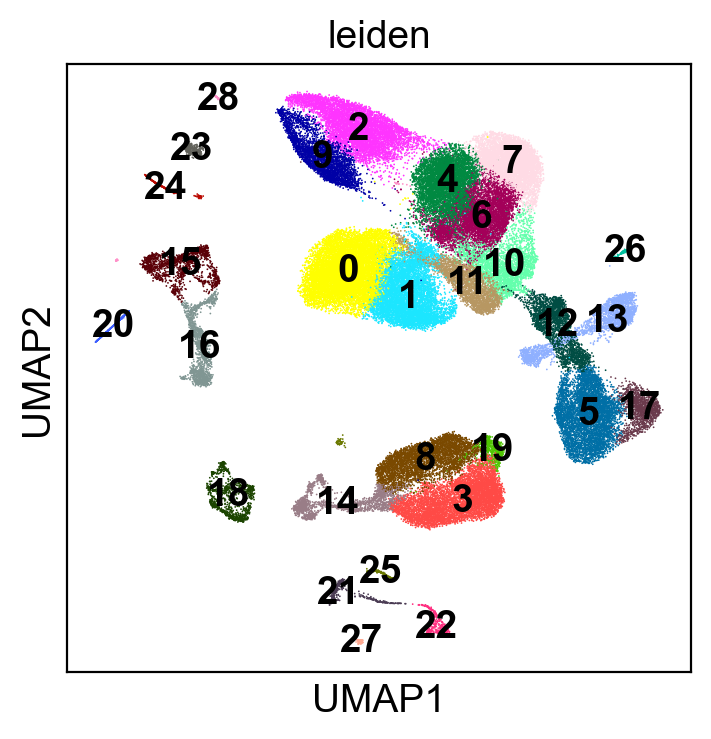

In [9]:
sc.tl.pca(adata, svd_solver="arpack")
sc.pp.neighbors(adata, n_neighbors=25, n_pcs=40)
sc.tl.leiden(adata)
sc.tl.umap(adata)
sc.pl.umap(adata, color=["leiden"], legend_loc="on data")

C:\Ryan\GitHub\scanpy\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


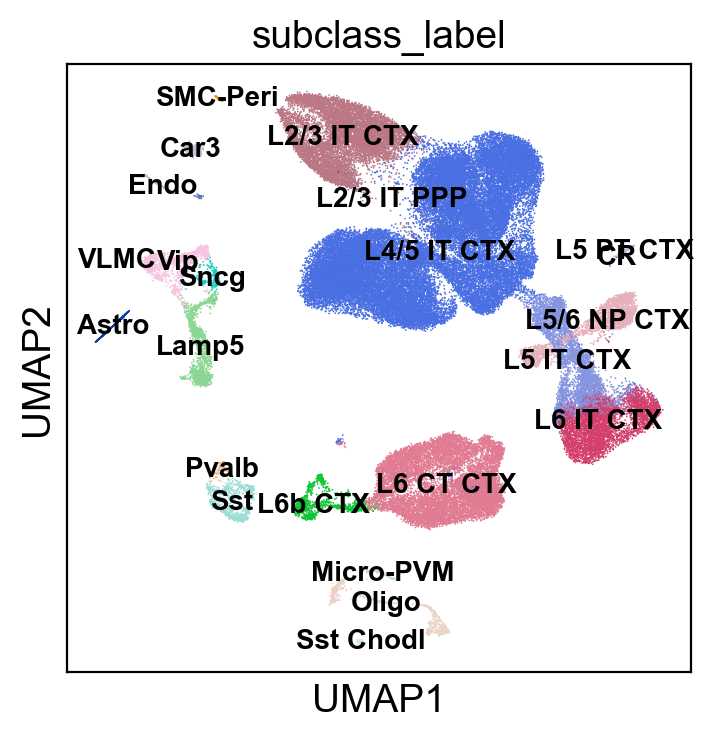

In [10]:
sc.pl.umap(adata, color=["subclass_label"], legend_loc="on data", legend_fontsize=10)

In [15]:
for classlabel, classname in zip(['Glutamatergic', 'GABAergic', 'Non-Neuronal'], ["glutamatergic", "GABAergic", "non-neuronal"]):
    mask = adata.obs["class_label"] == classlabel
    adata.obs.loc[mask, "class"] = classname

In [17]:
save_path = "E:/Mouse_S1/"

adata_raw.obs = adata.obs
adata_raw.write_h5ad(save_path + "Mouse_S1_All.h5ad")

adata.write_h5ad(save_path + "Mouse_S1_All_Clustered.h5ad")

for classname, filename in zip(["glutamatergic", "GABAergic", "non-neuronal"], ["Glut", "GABA", "Non"]):
    
    adata_class = adata[adata.obs["class"] == classname, :]
    del adata_class.uns
    del adata_class.obsm
    del adata_class.varm
    del adata_class.obsp

    adata_class.write_h5ad(save_path + "Mouse_S1_" + filename + ".h5ad")